# Crime data in Chicago (January 1, 2010 to December 30, 2019)

In [1]:
import pandas as pd
crime_data = pd.read_csv('2019_data.csv')
crime_data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [2]:
import datetime

cols_to_remove = list(crime_data)

# Separating the date column into month, day, year, and time columns
Months = []
Days   = []
Years  = []
Hours  = []

for row in crime_data['Date']:
    d = datetime.datetime.strptime(row, '%m/%d/%Y %I:%M:%S %p')
    Months.append(d.month)
    Days.append(d.day)
    Years.append(d.year)
    Hours.append(d.hour)
    
crime_data['Month'] = Months
crime_data['Day'] = Days
crime_data['Year'] = Years
crime_data['Hour'] = Hours

crime_data[-4:]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
442309,12218191,JD427803,11/10/2020 11:23:00 PM,085XX W ARGYLE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,NaN,NaN,2020,11/17/2020 03:49:30 PM,NaN,NaN,NaN,11,10,23
442310,12218461,JD427924,11/10/2020 11:30:00 PM,098XX S INDIANA AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,NaN,NaN,2020,11/17/2020 03:49:30 PM,NaN,NaN,NaN,11,10,23
442311,12218119,JD427805,11/10/2020 11:30:00 PM,043XX W HADDON AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,STREET,False,False,...,NaN,NaN,2020,11/17/2020 03:49:30 PM,NaN,NaN,NaN,11,10,23
442312,12219610,JD429300,11/10/2020 11:47:00 PM,058XX S KILBOURN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,NaN,NaN,2020,11/17/2020 03:49:30 PM,NaN,NaN,NaN,11,10,23


In [3]:
# 1-hot encoding for: Arrest, Location Description, Domestic, District, Primary Type, Community Area
discrete_variables = "Arrest, Location Description, Domestic, District, Primary Type, Community Area".split(", ")
print(discrete_variables)
for variable in discrete_variables:
    for dtype in crime_data[variable].dropna().unique():
        if (dtype != "nan"):
            crime_data[variable+"_"+str(dtype)]  = 1*(crime_data[variable] == dtype)

crime_data = crime_data.drop(columns=cols_to_remove)
crime_data[-4:]

['Arrest', 'Location Description', 'Domestic', 'District', 'Primary Type', 'Community Area']


,Month,Day,Hour,Arrest_False,Arrest_True,Location Description_APARTMENT,Location Description_RESIDENCE,Location Description_STREET,Location Description_RESIDENCE PORCH/HALLWAY,"Location Description_SCHOOL, PRIVATE, BUILDING",...,Community Area_34,Community Area_11,Community Area_52,Community Area_74,Community Area_59,Community Area_17,Community Area_10,Community Area_9,Community Area_37,Community Area_12
442309,11,10,23,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
442310,11,10,23,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
442311,11,10,23,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
442312,11,10,23,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
crime_data.std()

Month                                                     3.242002
Day                                                       8.890939
Hour                                                      6.610143
Arrest_False                                              0.394082
Arrest_True                                               0.394082
Location Description_APARTMENT                            0.353474
Location Description_RESIDENCE                            0.374852
Location Description_STREET                               0.418986
Location Description_RESIDENCE PORCH/HALLWAY              0.111638
Location Description_SCHOOL, PRIVATE, BUILDING            0.039779
Location Description_OTHER                                0.161790
Location Description_DAY CARE CENTER                      0.025641
Location Description_PARKING LOT/GARAGE(NON.RESID.)       0.136621
Location Description_RESTAURANT                           0.150254
Location Description_RESIDENCE-GARAGE                     0.08

In [5]:
#scale all variables to be between 0 and 1
#iterate through all columns
for c in crime_data.columns:
    crime_data[c] = (crime_data[c]-crime_data[c].min())/(crime_data[c].max() - crime_data[c].min())

crime_data.std().sort_values()

Location Description_BASEMENT                                           0.001504
Location Description_CHA PLAY LOT                                       0.001504
Location Description_GANGWAY                                            0.001504
Location Description_RAILROAD PROPERTY                                  0.001504
Location Description_TRAILER                                            0.001504
Location Description_CTA SUBWAY STATION                                 0.001504
Location Description_HORSE STABLE                                       0.001504
Location Description_NURSING HOME                                       0.001504
Location Description_LIQUOR STORE                                       0.001504
Location Description_CLUB                                               0.001504
Location Description_CHA HALLWAY                                        0.001504
Location Description_MOTEL                                              0.001504
Location Description_OFFICE 

In [6]:
import numpy as np

X = crime_data.to_numpy()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90909091, 0.3       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.90909091, 0.3       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.90909091, 0.3       , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [7]:
import sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=5) #find 2 principal components
fit = pca.fit(X)
print(("Explained Variance: %s") % (fit.explained_variance_ratio_))

pc1, pc2, pc3, pc4, p5 = pca.components_

weights1 = list(zip(pc1, crime_data.columns))
weights1.sort()

print('Principal Component 1: \n (Negative)',weights1[:5], '\n\n (Positive)' ,weights1[-5:])

Explained Variance: [0.08628763 0.0754605  0.04285676 0.03941992 0.03473581]
Principal Component 1: 
 (Negative) [(-0.5439823425703986, 'Domestic_False'), (-0.22991731968128443, 'Primary Type_THEFT'), (-0.21478954937526196, 'Location Description_STREET'), (-0.14503134862948336, 'Arrest_True'), (-0.07328461967173652, 'Primary Type_NARCOTICS')] 

 (Positive) [(0.14503134862948336, 'Arrest_False'), (0.21018968562314888, 'Location Description_RESIDENCE'), (0.22047925656090628, 'Location Description_APARTMENT'), (0.38376287185479857, 'Primary Type_BATTERY'), (0.5439823425703986, 'Domestic_True')]


In [14]:
#Model stuff will go here 
from sklearn.model_selection import train_test_split

X1 = crime_data.drop(columns = ['Arrest_True'])
y = crime_data['Arrest_True']

X_train_full, X_test_full, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=0)



In [8]:
# more examples from class below ...

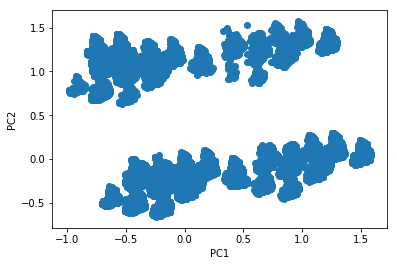

In [9]:
%matplotlib inline  

import matplotlib.pyplot as plt

Y = pca.transform(X)
plt.scatter(Y[:,0], Y[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Let's try to interpret this figure a bit more. Let's see where all the "Baathist" Arab countries lie on this plot:

In [10]:
arab = ['Syria', 'Jordan', 'Kuwait', 'UAE']
arab_index = [list(flag.index.values).index(a) for a in arab]
plt.scatter(Y[:,0], Y[:,1])
plt.scatter(Y[arab_index,0], Y[arab_index,1],color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

NameError: name 'flag' is not defined

Or we can look at all of the countries in northern europe

In [ ]:
ne = ['Norway', 'Denmark', 'Finland', 'Iceland']
ne_index = [list(flag.index.values).index(a) for a in ne]
plt.scatter(Y[:,0], Y[:,1])
plt.scatter(Y[ne_index,0], Y[ne_index,1],color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Clustering
When we were playing around with the data we manually used data clusters that we roughly knew about to validate our model. How do we do this automatically? Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In particular, we will focus on a simple form of clustering called "k-means". k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

Again, the mathematical details are better left for a machine learning class but you can see how to use scikit-learn to do this:

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 15) #break the data into 15 clusters
kmeans.fit(X)

In [ ]:
flag[kmeans.labels_ == 9]

In [ ]:
flag[kmeans.labels_ == 6]